# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1690743829498.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,07/28/2023,4582.23,--,4565.75,4590.16,4564.01
1,07/27/2023,4537.41,--,4598.26,4607.07,4528.56
2,07/26/2023,4566.75,--,4558.96,4582.47,4547.58
3,07/25/2023,4567.46,--,4555.19,4580.62,4552.42
4,07/24/2023,4554.64,--,4543.39,4563.41,4541.29
...,...,...,...,...,...,...
2533,08/05/2013,1707.14,--,1708.01,1709.24,1703.55
2534,08/02/2013,1709.67,--,1706.10,1709.67,1700.68
2535,08/01/2013,1706.87,--,1689.42,1707.85,1689.42
2536,07/31/2013,1685.73,--,1687.76,1698.43,1684.94


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2538.000000,2538.000000,2538.000000,2538.000000
mean,2881.995504,2865.228688,2880.793597,2848.517124
std,882.576162,916.437884,923.093081,909.616551
min,1630.480000,0.000000,0.000000,0.000000
25%,2088.870000,2088.562500,2096.637500,2078.975000
50%,2716.285000,2717.440000,2732.025000,2700.560000
75%,3702.857500,3706.550000,3728.480000,3684.100000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,2889.662412,2889.134052,2904.828824,2872.283059
std,882.155625,881.915580,888.463278,875.224899
min,1630.480000,1630.250000,1640.080000,1627.470000
25%,2091.480000,2091.340000,2099.890000,2082.100000
50%,2723.060000,2722.120000,2737.830000,2707.220000
75%,3719.980000,3723.030000,3744.630000,3694.120000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2537
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Volume      2517 non-null   object 
 3   Open        2517 non-null   float64
 4   High        2517 non-null   float64
 5   Low         2517 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.6+ KB


In [5]:
df.shape

(2517, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

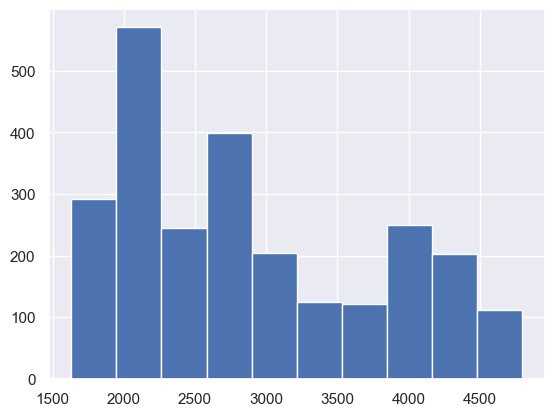

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4582.23

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2889.662411601119

In [10]:
close_sd = df['Close/Last'].std()
close_sd

882.1556253509574

In [11]:
sigma1 = close_mean + close_sd
sigma1

3771.8180369520765

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4653.973662303034

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5095.0514749785125

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2537
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-07-30 to 2023-07-28')

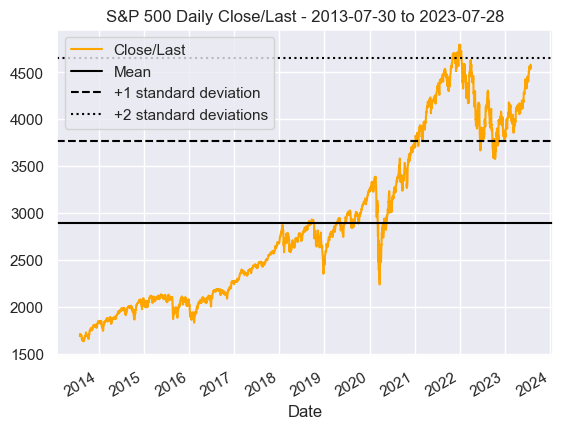

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-07-30 to 2023-07-28')

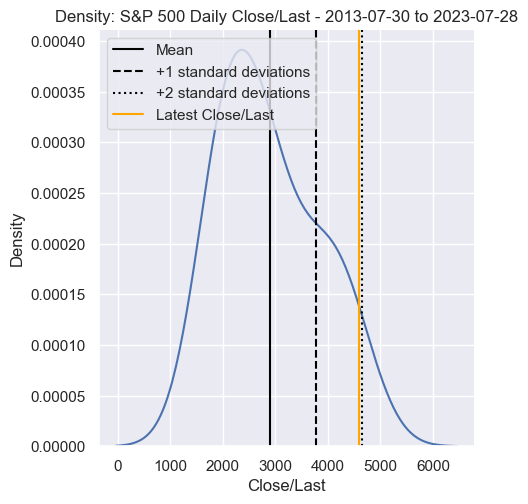

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.9186723291885244

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results